In [1]:
import utils
import numpy
import pandas
from collections import Counter

from sklearn.feature_extraction.text import CountVectorizer
from sklearn.naive_bayes import MultinomialNB

from sklearn import cross_validation

from sklearn.externals import joblib


In [4]:
train_df_raw = pandas.read_json("./dataset/df_train25k_name_desc_entropy_v14.json")
print 'before', len(train_df_raw)
train_df = train_df_raw[train_df_raw['description'].str.len() > 0]
print 'after', len(train_df)
print train_df.head()

before 25260
after 24858
                                            description  \
0     Institutional #Investor Magazine - Latest in G...   
1     The Connected Enterprise. Network World, an ID...   
10    1999 مدرب متخصص فى الاوبشن من سنه   \r\n(أعتذر...   
100   Our team of success-focused professionals help...   
1000  Orosil Smiths India Limited is known for its e...   

                                    description_nn_list  description_nn_prob  \
0     Investor Magazine Latest Global Finance News M...             0.999991   
1     Connected Enterprise Network World IDG Enterpr...             1.000000   
10                       Founder CEO Black bull options             0.000046   
100   team success professionals SM Es overcome busi...             0.901763   
1000  Orosil Smiths India Limited excellence custome...             0.999984   

     description_pr_list  description_pr_prob  description_prob  \
0                                    0.371954          0.985999   
1    

In [5]:
description = u'I owned every second that this world could give I saw so many places the things that I did With every broken bone I swear I lived'
#description = u'I place'

In [6]:
print utils.extract_description2(description)

I owned world give I saw places things I did With bone I swear I lived


In [12]:
train_df_P = train_df[train_df['po_tag']==0]
train_df_O = train_df[train_df['po_tag']==1]

In [13]:
desc_counter_P1 = Counter()
desc_counter_O1 = Counter()
desc_counter_P2 = Counter()
desc_counter_O2 = Counter()

desc_P1 = []
desc_P2 = []
desc_O1 = []
desc_O2 = []

desc_P = train_df_P['description'].tolist()
desc_O = train_df_O['description'].tolist()

In [14]:
for item in desc_P:
    temp = utils.extract_description3(item)
    desc_counter_P1.update(temp[0].lower().strip().split(' '))
    desc_counter_P2.update(temp[1].lower().strip().split(' '))
    desc_P1 += [temp[0]]
    desc_P2 += [temp[1]]

In [15]:
for item in desc_O:
    temp = utils.extract_description3(item)
    desc_counter_O1.update(temp[0].lower().strip().split(' '))
    desc_counter_O2.update(temp[1].lower().strip().split(' '))
    desc_O1 += [temp[0]]
    desc_O2 += [temp[1]]

In [16]:
print len(desc_counter_P1.values()), len(desc_counter_P2.values())
print len(desc_counter_O1.values()), len(desc_counter_O2.values())

print len(desc_P1), len(desc_P2)
print len(desc_O1), len(desc_O2)

24164 68
17422 55
14663 14663
10195 10195


In [17]:
labels_nn = desc_P1 + desc_O1
labels_pr = desc_P2 + desc_O2
y = [0 for _ in range(len(desc_P1))]  + [1 for _ in range(len(desc_O1))]

print len(labels_nn), len(labels_pr), len(y), sum(y)
print labels_nn[:5]
print labels_pr[:5]

24858 24858 24858 10195
[u'Founder CEO Black bull options', u'team success professionals SM Es overcome business problems', u'Researcher PRC Ph D Candidate Marketing University Geneva Switzerland', u'businesswoman wife mother daughter order Guernsey care future Island people', u'Gmb H Solution Architect Fusion Middleware SOA BPEL OAS Web Logic Oracle Service Bus']
['', u'Our', '', u'I I its', '']


In [18]:
cvector_nn = CountVectorizer(token_pattern='\\b\\w+\\b')
X_nn = cvector_nn.fit_transform(labels_nn)
nb_nn = MultinomialNB()
nb_nn.fit(X_nn, y)

MultinomialNB(alpha=1.0, class_prior=None, fit_prior=True)

In [19]:
%%time
cv = cross_validation.StratifiedKFold(y, n_folds=10)
scores = cross_validation.cross_val_score(nb_nn, X_nn, y, cv=cv)
print scores.mean(), scores.std()

0.878675789823 0.0402751734717
CPU times: user 200 ms, sys: 0 ns, total: 200 ms
Wall time: 199 ms


In [20]:
cvector_pr = CountVectorizer(token_pattern='\\b\\w+\\b')
X_pr = cvector_pr.fit_transform(labels_pr)
nb_pr = MultinomialNB()
nb_pr.fit(X_pr, y)

MultinomialNB(alpha=1.0, class_prior=None, fit_prior=True)

In [21]:
%%time
cv = cross_validation.StratifiedKFold(y, n_folds=10)
scores = cross_validation.cross_val_score(nb_pr, X_pr, y, cv=cv)
print scores.mean(), scores.std()

0.671213167843 0.0160948389873
CPU times: user 92 ms, sys: 0 ns, total: 92 ms
Wall time: 91.3 ms


In [238]:
description_raw = train_df_raw['description'].tolist()
print len(description_raw)
print description_raw[:3]

25260
[u'Institutional #Investor Magazine - Latest in Global #Finance News, #Markets, #HedgeFunds and Research & Rankings - Register for FREE http://t.co/294cDlxAkU', u'The Connected Enterprise. Network World, an IDG Enterprise brand, is the premier provider of news, intelligence and insight for network and IT executives.', u'1999 \u0645\u062f\u0631\u0628 \u0645\u062a\u062e\u0635\u0635 \u0641\u0649 \u0627\u0644\u0627\u0648\u0628\u0634\u0646 \u0645\u0646 \u0633\u0646\u0647   \r\n(\u0623\u0639\u062a\u0630\u0631 \u0639\u0646 \u062a\u0642\u062f\u064a\u0645 \u0627\u0644\u062a\u0648\u0635\u064a\u0627\u062a \u0623\u0648 \u0627\u0644\u062a\u062d\u0644\u064a\u0644 \u062d\u0633\u0628 \u0627\u0644\u0637\u0644\u0628)\r\nFounder and CEO of Black bull options\r\n\r\ninfo@blackbulloptions.com']


In [239]:
description_nn_list = []
description_nn_prob = []
description_pr_list = []
description_pr_prob = []


In [240]:


for item in description_raw:
    desc_refined_list = utils.extract_description3(item)
    
    description_nn_list += [desc_refined_list[0]]
    description_pr_list += [desc_refined_list[1]]
    
    cvect_nn = cvector_nn.transform([desc_refined_list[0]])
    cvect_pr = cvector_pr.transform([desc_refined_list[1]])
    
    desc_nn_logprob = nb_nn.predict_log_proba(cvect_nn)[0]
    desc_pr_logprob = nb_pr.predict_log_proba(cvect_pr)[0]
    
    description_nn_prob += [desc_nn_logprob[0]/sum(desc_nn_logprob)]
    description_pr_prob += [desc_pr_logprob[0]/sum(desc_pr_logprob)]

In [253]:
train_df_raw['description_nn_list'] = description_nn_list
train_df_raw['description_nn_prob'] = description_nn_prob
train_df_raw['description_pr_list'] = description_pr_list
train_df_raw['description_pr_prob'] = description_pr_prob

In [242]:
print len(description_nn_list), len(description_pr_list)
print len(description_nn_prob), len(description_pr_prob)

25260 25260
25260 25260


In [247]:
for i in range(10):
    print description_nn_prob[i], description_pr_prob[i], description_raw[i], train_df.iloc[i]['po_tag']


0.999990780427 0.371953680913 Institutional #Investor Magazine - Latest in Global #Finance News, #Markets, #HedgeFunds and Research & Rankings - Register for FREE http://t.co/294cDlxAkU 1
0.999999784238 0.313002728529 The Connected Enterprise. Network World, an IDG Enterprise brand, is the premier provider of news, intelligence and insight for network and IT executives. 1
4.56673281383e-05 0.371953680913 1999 مدرب متخصص فى الاوبشن من سنه   
(أعتذر عن تقديم التوصيات أو التحليل حسب الطلب)
Founder and CEO of Black bull options

info@blackbulloptions.com 0
0.901762886301 0.93201354654 Our team of success-focused professionals help SMEs with great potential overcome unexpected financial & other business problems. http://t.co/meqL8Vkw 0
0.999983802598 0.981758143023 Orosil Smiths India Limited is known for its excellence has been dedicated to offer its customers affordable precious jewellery. 1
1.04596784699e-06 0.371953680913 Certified Professional Researcher (PRC), and PhD Candidate in Mar

In [251]:
print len(cvector_nn.vocabulary_)
print len(cvector_pr.vocabulary_)

33769
89


In [208]:
description = u'I owned every second that this world could give I saw so many places the things that I did With every broken bone I swear I lived'
#description = u'I owned every second that this world could give, house price'
temp = utils.extract_description3(description)

print temp[0]
print temp[1]

world places things With bone
I I I I I


In [209]:
result_nn = nb_nn.predict_log_proba(cvector_nn.transform([temp[0]]))[0]
print result_nn[0]/sum(result_nn)

0.410960404981


In [211]:
result_pr = nb_pr.predict_log_proba(cvector_pr.transform([temp[1]]))[0]
print result_pr[0]/sum(result_pr)

7.46026285376e-07


In [210]:
x_test = cvector_pr.transform(['i'])
x_tokens = cvector_pr.transform(['its'])
result_pr = nb_pr.predict_log_proba(x_tokens)[0]
print result_pr
print result_pr[0]/sum(result_pr)

[-1.50886104 -0.24995187]
0.857886040468


In [250]:
x_tokens = cvector_nn.transform(['xxxxxxxxxxxxx'])
result_nn = nb_nn.predict_log_proba(x_tokens)[0]
print result_nn
print result_nn[0]/sum(result_nn)

[-0.52785232 -0.89128223]
0.371953680913


In [ ]:
[-0.53948916 -0.87477942]
0.381461606514


In [254]:
train_df_raw.to_csv('./df_train.csv', sep='\t', encoding='utf-8', quoting=1)

In [255]:
train_df_raw.to_json("./dataset/df_train25k_name_desc_entropy_v14.json")

In [252]:
joblib.dump(cvector_nn, './models/sub_model_desc_cvector_nn')
joblib.dump(cvector_pr, './models/sub_model_desc_cvector_pr')
joblib.dump(nb_nn, './models/sub_model_desc_nb_nn')
joblib.dump(nb_pr, './models/sub_model_desc_nb_pr')

['./models/sub_model_desc_nb_pr',
 './models/sub_model_desc_nb_pr_01.npy',
 './models/sub_model_desc_nb_pr_02.npy',
 './models/sub_model_desc_nb_pr_03.npy',
 './models/sub_model_desc_nb_pr_04.npy',
 './models/sub_model_desc_nb_pr_05.npy']

In [35]:
joblib.dump(cvector, './models/sub_model_desc_cvector_new')
joblib.dump(nb, './models/sub_model_desc_cvector_new')

['./models/sub_model_desc_nb_new',
 './models/sub_model_desc_nb_new_01.npy',
 './models/sub_model_desc_nb_new_02.npy',
 './models/sub_model_desc_nb_new_03.npy',
 './models/sub_model_desc_nb_new_04.npy',
 './models/sub_model_desc_nb_new_05.npy']

In [231]:
test_cv = CountVectorizer(analyzer='word', token_pattern='\\b\\w+\\b')
#test_cv = CountVectorizer(analyzer='word')
test_X = test_cv.fit_transform(['I have a bussiness dream'])
print test_cv.token_pattern
print len(test_cv.vocabulary_)
print test_cv.vocabulary_

\b\w+\b
5
{u'i': 4, u'a': 0, u'bussiness': 1, u'dream': 2, u'have': 3}


In [28]:
#visualization
import utils
from matplotlib import pyplot

%matplotlib inline

In [47]:
desc_raw_list = train_df_raw['description'].tolist()

In [48]:

desc_nnlogprob_P_list = []
desc_prlogprob_P_list = []
desc_nnlogprob_O_list = []
desc_prlogprob_O_list = []
for i,row in train_df_raw.iterrows():
    logprobs = utils.get_description_logprob(row['description'], nb_nn, nb_pr, cvector_nn, cvector_pr)
    if row['po_tag'] == 0:
        desc_nnlogprob_P_list.append(logprobs[0].tolist())
        desc_prlogprob_P_list.append(logprobs[1].tolist())
    elif row['po_tag'] == 1:
        desc_nnlogprob_O_list.append(logprobs[0].tolist())
        desc_prlogprob_O_list.append(logprobs[1].tolist())
    
    if i % 1000 == 0:
        print i
    

0.0
1000.0
10000.0
11000.0
12000.0
13000.0
14000.0
15000.0
16000.0
17000.0
18000.0
19000.0
2000.0
20000.0
21000.0
22000.0
23000.0
24000.0
25000.0
3000.0
4000.0
5000.0


KeyboardInterrupt: 

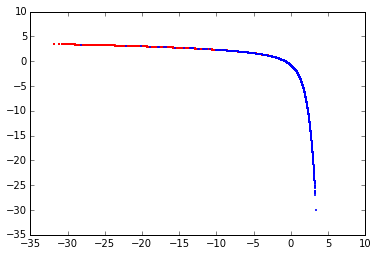

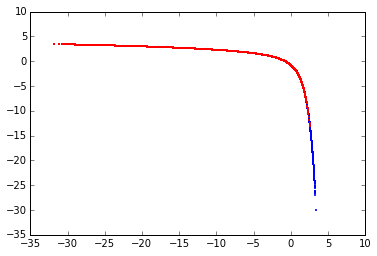

In [58]:
x1, x2 = zip(*desc_nnlogprob_P_list)
x3, x4 = zip(*desc_nnlogprob_O_list)


pyplot.scatter(numpy.log(-numpy.array(x1)), numpy.log(-numpy.array(x2)), color='red', s=1)
pyplot.scatter(numpy.log(-numpy.array(x3)), numpy.log(-numpy.array(x4)), color='blue', s=1)
pyplot.figure()
pyplot.scatter(numpy.log(-numpy.array(x3)), numpy.log(-numpy.array(x4)), color='blue', s=1)
pyplot.scatter(numpy.log(-numpy.array(x1)), numpy.log(-numpy.array(x2)), color='red', s=1)


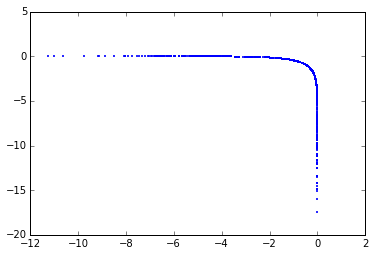

In [43]:
x3, x4 = zip(*desc_prlogprob_list)
pyplot.scatter(x3, x4, color='blue', s=1)

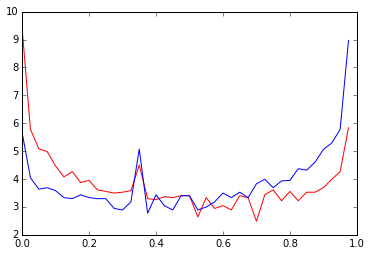

In [53]:
train_df_P = train_df[train_df['po_tag']==0]
train_df_O = train_df[train_df['po_tag']==1]

histP, binP = numpy.histogram(train_df_P['description_nn_prob'].tolist(), 40)
histO, binO = numpy.histogram(train_df_O['description_nn_prob'].tolist(), 40)

pyplot.plot(binP[:-1], numpy.log(histP), 'r')
pyplot.plot(binO[:-1], numpy.log(histO), 'b')

In [154]:
#data presentation

[]


In [192]:
print len(cvector_nn.vocabulary_)
print len(cvector_pr.vocabulary_)


33769
89


In [226]:
print desc_P1[:10]
print desc_P2[:10]
print desc_O1[:10]
print desc_O2[:10]

[u'Founder CEO Black bull options', u'team success professionals SM Es overcome business problems', u'Researcher PRC Ph D Candidate Marketing University Geneva Switzerland', u'businesswoman wife mother daughter order Guernsey care future Island people', u'Gmb H Solution Architect Fusion Middleware SOA BPEL OAS Web Logic Oracle Service Bus', u'Communication Specialists Entrepreneur Economic Emancipator Book Addict Political Think Tank Author Commentator', u'Independent Trader Gold Investor Extreme', u'Thoughts insights investment opportunities dynamics', u'Chief Curator Uppsala University Coin Cabinet Sweden', u'Head Research Asia Pacific Knight Frank']
['', u'Our', '', u'I I its', '', '', '', u'our', '', '']
[u'Investor Magazine Latest Global Finance News Markets Hedge Funds Research Rankings Register FREE', u'Connected Enterprise Network World IDG Enterprise brand premier provider news intelligence insight network', u'Orosil Smiths India Limited excellence customers jewellery', u'Die 

In [227]:
print desc_counter_P1.most_common(100)


[(u'business', 4098), (u'founder', 3387), (u'manager', 1715), (u'economist', 1631), (u'director', 1630), (u'co', 1090), (u'marketing', 1003), (u'media', 921), (u'entrepreneur', 877), (u'ceo', 871), (u'development', 807), (u'consultant', 746), (u'engineer', 614), (u'investor', 608), (u'views', 584), (u'strategist', 575), (u'trader', 574), (u'father', 548), (u'social', 535), (u'management', 525), (u'writer', 519), (u's', 512), (u'life', 506), (u'lover', 489), (u'digital', 482), (u'i', 481), (u'husband', 470), (u'student', 469), (u'owner', 460), (u'author', 456), (u'fan', 446), (u'tweets', 441), (u'journalist', 438), (u'editor', 436), (u'president', 430), (u'analyst', 417), (u'finance', 404), (u'university', 396), (u'world', 395), (u'y', 385), (u'music', 384), (u'technology', 372), (u'tech', 370), (u'm', 364), (u'software', 345), (u'love', 343), (u'sports', 335), (u'specialist', 321), (u'news', 317), (u'developer', 315), (u'speaker', 313), (u'time', 312), (u'enthusiast', 311), (u'internat

In [228]:
print desc_counter_O1.most_common(100)

[(u'business', 1384), (u'news', 1333), (u'company', 816), (u'services', 797), (u'twitter', 769), (u'world', 673), (u's', 579), (u'management', 569), (u'solutions', 540), (u'investment', 476), (u'technology', 435), (u'service', 407), (u'uk', 403), (u'follow', 397), (u'development', 386), (u'account', 376), (u'financial', 338), (u'market', 333), (u'energy', 329), (u'industry', 327), (u'group', 318), (u'information', 303), (u'media', 296), (u'firm', 287), (u'products', 281), (u'research', 280), (u'businesses', 280), (u'provider', 275), (u'finance', 268), (u'online', 266), (u'people', 265), (u'marketing', 264), (u'tweets', 255), (u'official', 247), (u'companies', 236), (u'community', 233), (u'advice', 227), (u'e', 221), (u'team', 220), (u'we', 215), (u'estate', 215), (u'stock', 214), (u'data', 212), (u'health', 207), (u'r', 206), (u'markets', 206), (u'clients', 205), (u'software', 205), (u'n', 205), (u'trading', 202), (u'leader', 202), (u'insurance', 196), (u'investors', 195), (u'life', 19

In [229]:
print desc_counter_P2.most_common(100)

[('', 10907), (u'i', 1888), (u'my', 1519), (u'you', 430), (u'it', 420), (u'me', 387), (u'your', 281), (u'we', 140), (u'their', 138), (u'our', 95), (u'us', 58), (u'they', 46), (u'his', 36), (u'them', 33), (u'he', 29), (u'its', 28), (u'her', 21), (u'entrepreneur', 19), (u'myself', 19), (u'labour', 15), (u'yourself', 14), (u'self', 14), (u'she', 8), (u'him', 7), (u'u', 7), (u'pour', 6), (u'hey', 6), (u'amateur', 4), (u'tour', 4), (u'itself', 3), (u'behaviour', 3), (u'em', 2), (u'humour', 2), (u'nieur', 2), (u'themselves', 2), (u'photographer', 2), (u'sur', 2), (u'hour', 2), (u'colour', 2), (u'withyou', 1), (u'earthhour', 1), (u'dreamy', 1), (u'zmir', 1), (u'edu', 1), (u'himself', 1), (u'entrepeneur', 1), (u'golf', 1), (u'jour', 1), (u'nateur', 1), (u'philosopher', 1), (u'sem', 1), (u'preneur', 1), (u'redakteur', 1), (u'swim', 1), (u'heir', 1), (u'dghour', 1), (u'lair', 1), (u'du', 1), (u'yu', 1), (u'directeur', 1), (u'mayhem', 1), (u'ourself', 1), (u'valiusacademy', 1), (u'provocateur', 1

In [230]:
print desc_counter_O2.most_common(100)

[('', 7201), (u'we', 1152), (u'our', 694), (u'your', 577), (u'you', 525), (u'us', 515), (u'it', 276), (u'their', 244), (u'i', 155), (u'its', 115), (u'my', 52), (u'them', 47), (u'they', 38), (u'me', 31), (u'self', 8), (u'itself', 7), (u'pour', 6), (u'yourself', 5), (u'her', 5), (u'sur', 5), (u'his', 3), (u'hour', 3), (u'himself', 2), (u'diteur', 2), (u'rwe', 2), (u'he', 2), (u'ou', 2), (u'fair', 1), (u'harbour', 1), (u'entrepreneur', 1), (u'gliche', 1), (u'humour', 1), (u'balfour', 1), (u'labour', 1), (u'hem', 1), (u'wirtschaftliche', 1), (u'politische', 1), (u'gesellschaftliche', 1), (u'zur', 1), (u'wir', 1), (u'niche', 1), (u'shelf', 1), (u'behaviour', 1), (u'whatour', 1), (u'bachem', 1), (u'du', 1), (u'themselves', 1), (u'myself', 1), (u'fondateur', 1), (u'aem', 1), (u'skyharbour', 1), (u'tour', 1), (u'freiberufliche', 1), (u'colour', 1), (u'bethlehem', 1)]
